In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_directory = pathlib.Path('dataset/asl_alphabet_train');
len(list(data_directory.glob('*/*.jpg')))

87000

In [3]:
import os
folder_names = [name for name in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, name))]


In [4]:
folder_names = sorted(folder_names, key=lambda x: (x[0].islower(), x))
folder_names[:2], folder_names[26:]

(['A', 'B'], ['del', 'nothing', 'space'])

In [5]:
alphabet_images_dict = {
    folder: list(data_directory.glob(f"{folder}/*"))
    for folder in os.listdir(data_directory)
    if(data_directory / folder).is_dir()
}
len(alphabet_images_dict['A']), len(alphabet_images_dict['del'])

(3000, 3000)

In [6]:
alphabet_labels_dict = {
    folder: index for index, folder in enumerate(folder_names)
}
alphabet_labels_dict['A'], alphabet_labels_dict['B'], alphabet_labels_dict['nothing']

(0, 1, 27)

In [7]:
img = cv2.imread(str(alphabet_images_dict['A'][0]))
img.shape

(200, 200, 3)

In [10]:
X = np.zeros((87000, 32, 32, 3), dtype=np.float32)
y = np.zeros(87000, dtype=int)

idx = 0
for alphabet, images in alphabet_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(32, 32))
        X[idx] = resized_img
        y[idx] = alphabet_labels_dict[alphabet]
        idx += 1

In [15]:
X_scaled = X / 255

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=0)

In [32]:
num_classes = 29

# Model Definition
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes)
])

# Optimizer and Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Data Augmentation (optional but recommended)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False
)

# Train the Model
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Training data only
    epochs=30,
    steps_per_epoch=len(X_train) // 32  # Ensures one full pass over the dataset per epoch
)


Epoch 1/30


c:\Users\tusha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2310/2310 ━━━━━━━━━━━━━━━━━━━━ 73s 31ms/step - accuracy: 0.3868 - loss: 2.0329
Epoch 2/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.8750 - loss: 0.4402  
Epoch 3/30
   3/2310 ━━━━━━━━━━━━━━━━━━━━ 1:12 32ms/step - accuracy: 0.6806 - loss: 0.8797

c:\Users\tusha\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2310/2310 ━━━━━━━━━━━━━━━━━━━━ 71s 31ms/step - accuracy: 0.8290 - loss: 0.5046
Epoch 4/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.9688 - loss: 0.2477   
Epoch 5/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 71s 31ms/step - accuracy: 0.8845 - loss: 0.3392
Epoch 6/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.9375 - loss: 0.1846   
Epoch 7/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 70s 30ms/step - accuracy: 0.9131 - loss: 0.2609
Epoch 8/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.9062 - loss: 0.2084   
Epoch 9/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 70s 30ms/step - accuracy: 0.9257 - loss: 0.2201
Epoch 10/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.9062 - loss: 0.2420   
Epoch 11/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 70s 30ms/step - accuracy: 0.9347 - loss: 0.1964
Epoch 12/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step - accuracy: 0.9688 - loss: 0.1855   
Epoch 13/30
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 71s 31ms/step - accuracy: 0.9386 - loss: 0.1809
Epoch 14/30


In [33]:
model.evaluate(X_test, y_test)

408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9662 - loss: 0.1172


[0.11148800700902939, 0.968658983707428]

In [34]:
X_test.shape, X_train.shape

((13050, 32, 32, 3), (73950, 32, 32, 3))

In [35]:
predictions = model.predict(X_test)

408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


408/408 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


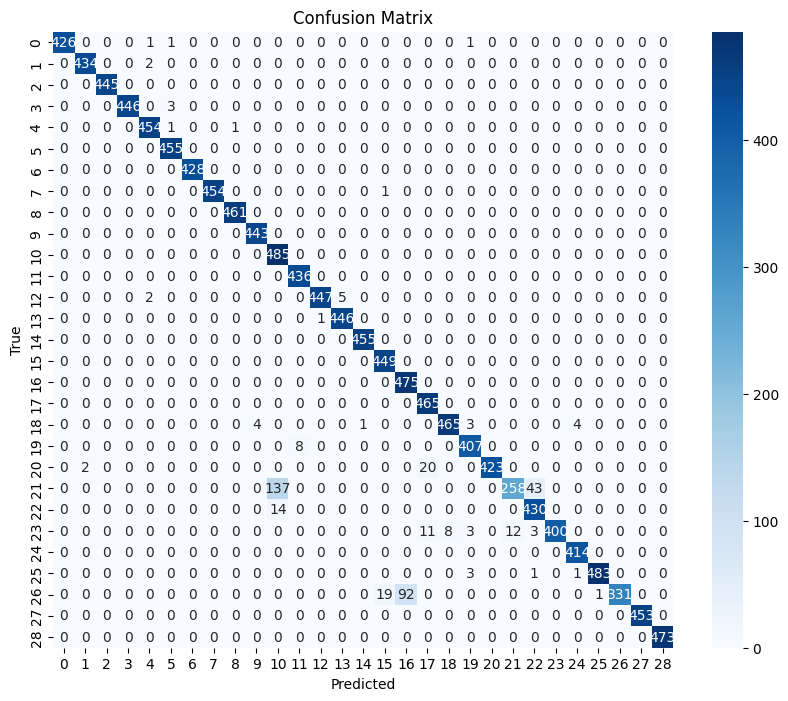

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       429
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       445
           3       1.00      0.99      1.00       449
           4       0.99      1.00      0.99       456
           5       0.99      1.00      0.99       455
           6       1.00      1.00      1.00       428
           7       1.00      1.00      1.00       455
           8       1.00      1.00      1.00       461
           9       0.99      1.00      1.00       443
          10       0.76      1.00      0.87       485
          11       0.98      1.00      0.99       436
          12       1.00      0.98      0.99       454
          13       0.99      1.00      0.99       447
          14       1.00      1.00      1.00       455
          15       0.96      1.00      0.98       449
          16       0.84      1.00      0.91       475
          17       0.94    

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
